# NOTES

# IMPORTS

In [1]:
from keras import layers
from keras import models
from keras.optimizers import SGD
from keras import backend as K
from keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


# DATASET

## Variables

In [2]:
lb = LabelBinarizer()
(train_samples, train_labels), (test_samples, test_labels) = cifar10.load_data()

## Data

In [3]:
# Normalization
train_samples = train_samples.astype('float') / 255.0
test_samples = test_samples.astype('float') / 255.0
print(train_samples.shape)
print(test_samples.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Labels

In [4]:
# Binarization
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


## Splitting

In [5]:
(trainX, validationX, trainY, validationY) = train_test_split(train_samples, train_labels, test_size=0.30)
(validationX, predX, validationY, predY) = train_test_split(validationX, validationY, test_size=0.3333)
print('TrainX shape: ',train_samples.shape)
print('ValidationX shape:', validationX.shape)
print('PredictionX shape:', predX.shape)

TrainX shape:  (50000, 32, 32, 3)
ValidationX shape: (10000, 32, 32, 3)
PredictionX shape: (5000, 32, 32, 3)


# ARCHITECTURE

In [6]:
# Network Variables
width = 32
height = 32
depth = 3
filter_01 = 32
filter_02 = 64
pool_size = (2, 2)
conv_stride = (3, 3)
pad = 'same'
classes = 10
input_shape = (width, height, depth)
channels_dim = -1

# Configure input shape
if K.image_data_format() == 'channels_first':
    input_shape = (depth, width, height)
    channels_dim = 1

# Architecture
model = models.Sequential()
model.add(layers.Conv2D(filter_01, conv_stride, padding=pad, input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.Conv2D(filter_01, conv_stride, padding=pad))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.MaxPooling2D(pool_size=pool_size))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(filter_02, conv_stride, padding=pad))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.Conv2D(filter_02, conv_stride, padding=pad))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.MaxPooling2D(pool_size=pool_size))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(classes))
model.add(layers.Activation('softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

# COMPILE AND TRAIN

## Compilation

In [7]:
learning_rate = 0.01
opt = SGD(lr = learning_rate, decay = 0.01 / 40, momentum=0.9, nesterov=True)

print('[INFO] compiling...')
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
print('[INFO] completed.')

[INFO] compiling...
[INFO] completed.


## Training

In [8]:
history = model.fit(trainX, trainY, epochs=40, batch_size=32, validation_data=(validationX, validationY))

Train on 35000 samples, validate on 10000 samples
Epoch 1/40
35000/35000 [==============================] - 86s 2ms/step - loss: 1.6627 - acc: 0.4479 - val_loss: 2.1842 - val_acc: 0.3619
Epoch 2/40
35000/35000 [==============================] - 68s 2ms/step - loss: 1.1442 - acc: 0.6031 - val_loss: 0.9634 - val_acc: 0.6629
Epoch 3/40
35000/35000 [==============================] - 74s 2ms/step - loss: 0.9436 - acc: 0.6717 - val_loss: 0.8769 - val_acc: 0.6930
Epoch 4/40
35000/35000 [==============================] - 71s 2ms/step - loss: 0.8341 - acc: 0.7093 - val_loss: 0.7977 - val_acc: 0.7207
Epoch 5/40
35000/35000 [==============================] - 73s 2ms/step - loss: 0.7368 - acc: 0.7416 - val_loss: 0.8186 - val_acc: 0.7127
Epoch 6/40
35000/35000 [==============================] - 73s 2ms/step - loss: 0.6728 - acc: 0.7653 - val_loss: 0.7388 - val_acc: 0.7467
Epoch 7/40
35000/35000 [==============================] - 74s 2ms/step - loss: 0.6105 - acc: 0.7845 - val_loss: 0.7104 - val_acc

# PLOTTING TRAIN RESULT

## Variables

In [11]:
history_dict = history.history
epochs = np.arange(0, 40)

accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.style.use('ggplot')

## Accuracy

<function matplotlib.pyplot.show(*args, **kw)>

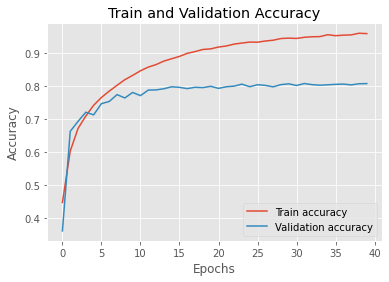

In [13]:
plt.plot(epochs, accuracy, label='Train accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss

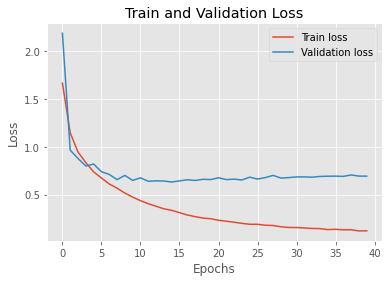

In [14]:
plt.clf()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATION

In [16]:
results = model.evaluate(test_samples, test_labels)
results

10000/10000 [==============================] - 10s 998us/step


[0.7186503355026245, 0.8025000095367432]

# PREDICTION

In [18]:
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(predX, batch_size=32)
print(classification_report(predY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.84      0.83      0.84       503
  automobile       0.91      0.90      0.91       526
        bird       0.75      0.69      0.72       479
         cat       0.64      0.61      0.63       501
        deer       0.76      0.80      0.78       521
         dog       0.73      0.71      0.72       487
        frog       0.81      0.88      0.84       506
       horse       0.84      0.87      0.86       486
        ship       0.89      0.88      0.88       484
       truck       0.89      0.89      0.89       507

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



# CONCLUSION

In [ ]:
                                                                       With BatchNormalization
The model finish to train on cifar10 dataset and manage obtain an accuracy of 81% a jump of 23% from a novice/shallowNet II obtained accuracy of 58%